In [9]:
#A1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

#First load the dataset
def load_data(file_path):
    return pd.read_csv(file_path)

# This fuction preprcesses the data and seperates the data by replacing the Nan values with mean of the data and the string values with float as it is required in the number of dependents
def preprocess_data(data):
    # Replacing the NaN values with the mean of the each provided column
    data = data.fillna(data.mean())

    # One-hot encode of all the categorical variables
    data = pd.get_dummies(data, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

    # Fill NaN values in 'Dependents' column with a default value (e.g., 0)
    data['Dependents'] = data['Dependents'].fillna(0)

    # Convert 'Dependents' column to numerical values, as not all are numeric values
    data['Dependents'] = data['Dependents'].replace({'3+': 3}).astype(int)

    X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
    y = data['Loan_Status'].map({'Y': 1, 'N': 0})
    return X, y

def train_and_evaluate(X_train, y_train, X_test, y_test):
    # Initialize and train the classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Predictions on training and test set
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Calculate precision, recall, and F1-Score for training set
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)

    # Calculate precision, recall, and F1-Score for test set
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    return cm_train, cm_test, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test

# Main program
if __name__ == "__main__":
    # Load data
    file_path = '/content/loan-train.csv'
    data = load_data(file_path)

    # Preprocess data
    X, y = preprocess_data(data)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate the model
    cm_train, cm_test, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test = train_and_evaluate(X_train, y_train, X_test, y_test)

    # Print results
    print("Confusion Matrix (Training Set):\n", cm_train)
    print("Precision (Training Set):", precision_train)
    print("Recall (Training Set):", recall_train)
    print("F1-Score (Training Set):", f1_train)

    print("\nConfusion Matrix (Test Set):\n", cm_test)
    print("Precision (Test Set):", precision_test)
    print("Recall (Test Set):", recall_test)
    print("F1-Score (Test Set):", f1_test)


<ipython-input-9-1c8b25ff4f4c>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


Confusion Matrix (Training Set):
 [[149   0]
 [  0 342]]
Precision (Training Set): 1.0
Recall (Training Set): 1.0
F1-Score (Training Set): 1.0

Confusion Matrix (Test Set):
 [[19 24]
 [ 3 77]]
Precision (Test Set): 0.7623762376237624
Recall (Test Set): 0.9625
F1-Score (Test Set): 0.8508287292817679


In [10]:
# A2-
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

file_path = "/content/Lab3PurchaseData.xlsx"
df = pd.read_excel(file_path, sheet_name='Purchase data').iloc[:, :5]

# Extract matrices A and C from the loaded data
A = df.iloc[:, 1:4]  # Matrix A represents the features of the purchased products
C = df.iloc[:, 4]    # Matrix C represents the total cost for each purchase transaction

# Display matrices A and C
print("Matrix A (Product Features):")
print(A)
print("\nMatrix C (Total Cost):")
print(C)

# Display dimensionality of the vector space
dimensionality = A.shape[1]
print(f"\nDimensionality of the vector space: {dimensionality}")

# Display the number of vectors in the vector space
num_vectors = A.shape[0]
print(f"Number of vectors in the vector space: {num_vectors}")

# Calculate the rank of matrix A
rank_A = np.linalg.matrix_rank(A)
print(f"Rank of Matrix A: {rank_A}")

# Using Pseudo-Inverse to find the cost of each product
A_pseudo_inverse = np.linalg.pinv(A)
product_costs = np.dot(A_pseudo_inverse, C)

# Display the cost of each product
print("\nEstimated Cost of Each Product:")
for i, cost in enumerate(product_costs):
    print(f"Product {i+1}: {cost}")

# Evaluate predictions using MSE, RMSE, MAPE, and R2
predictions = np.dot(A, product_costs)

mse = mean_squared_error(C, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((C - predictions) / C)) * 100
r2 = r2_score(C, predictions)

# Display evaluation metrics
print("\nEvaluation Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R2 Score: {r2}")


Matrix A (Product Features):
   Candies (#)  Mangoes (Kg)  Milk Packets (#)
0           20             6                 2
1           16             3                 6
2           27             6                 2
3           19             1                 2
4           24             4                 2
5           22             1                 5
6           15             4                 2
7           18             4                 2
8           21             1                 4
9           16             2                 4

Matrix C (Total Cost):
0    386
1    289
2    393
3    110
4    280
5    167
6    271
7    274
8    148
9    198
Name: Payment (Rs), dtype: int64

Dimensionality of the vector space: 3
Number of vectors in the vector space: 10
Rank of Matrix A: 3

Estimated Cost of Each Product:
Product 1: 0.9999999999999989
Product 2: 54.99999999999999
Product 3: 18.0

Evaluation Metrics:
MSE: 3.2311742677852644e-27
RMSE: 5.684341886080802e-14
MAPE: 2.0176081332685

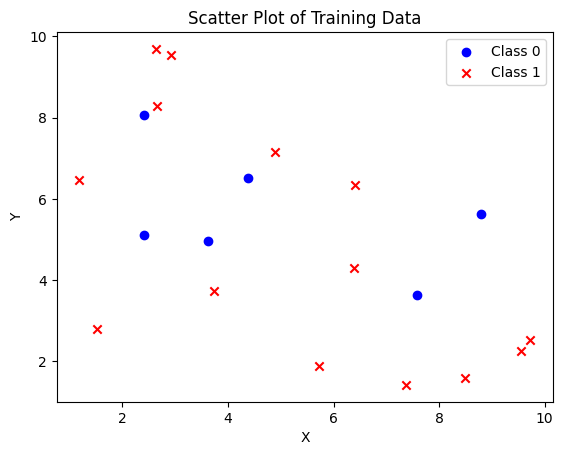

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate 20 data points with random values between 1 and 10 for features X and Y
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

# Assign points to two different classes (class 0 - Blue and class 1 - Red)
classes = np.random.randint(2, size=20)

# Scatter plot with colors based on class
plt.scatter(X[classes == 0], Y[classes == 0], c='blue', label='Class 0', marker='o')
plt.scatter(X[classes == 1], Y[classes == 1], c='red', label='Class 1', marker='x')

# Set plot labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data')
plt.legend()

# Show the plot
plt.show()


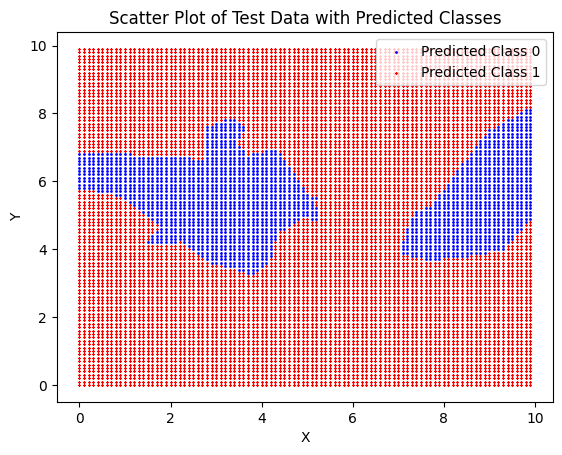

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1
test_X, test_Y = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))
test_data = np.column_stack((test_X.ravel(), test_Y.ravel()))

# Initialize kNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the kNN classifier with training data
knn_classifier.fit(np.column_stack((X, Y)), classes)

# Predict classes for the test data
predicted_classes = knn_classifier.predict(test_data)

# Scatter plot with colors based on predicted class
plt.scatter(test_data[predicted_classes == 0, 0], test_data[predicted_classes == 0, 1], c='blue', s=1, label='Predicted Class 0', marker='o')
plt.scatter(test_data[predicted_classes == 1, 0], test_data[predicted_classes == 1, 1], c='red', s=1, label='Predicted Class 1', marker='x')

# Set plot labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Test Data with Predicted Classes')
plt.legend()

# Show the plot
plt.show()


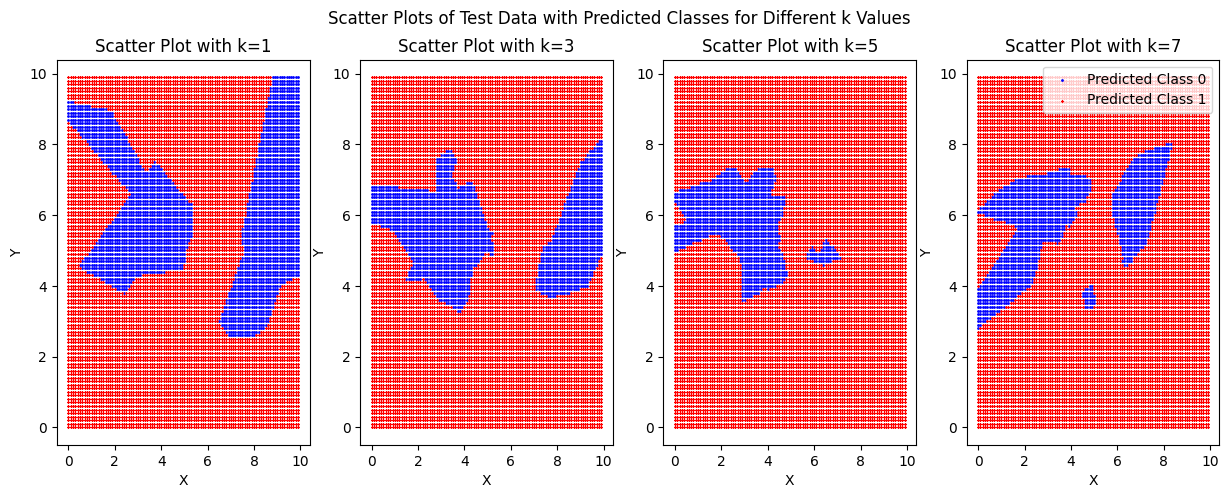

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1
test_X, test_Y = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))
test_data = np.column_stack((test_X.ravel(), test_Y.ravel()))

# Initialize kNN classifiers with different values of k
k_values = [1, 3, 5, 7]
classifiers = [KNeighborsClassifier(n_neighbors=k) for k in k_values]

# Create subplots for each k value
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))

for i, (k, clf) in enumerate(zip(k_values, classifiers)):
    # Fit the kNN classifier with training data
    clf.fit(np.column_stack((X, Y)), classes)

    # Predict classes for the test data
    predicted_classes = clf.predict(test_data)

    # Scatter plot with colors based on predicted class
    axes[i].scatter(test_data[predicted_classes == 0, 0], test_data[predicted_classes == 0, 1], c='blue', s=1, label='Predicted Class 0', marker='o')
    axes[i].scatter(test_data[predicted_classes == 1, 0], test_data[predicted_classes == 1, 1], c='red', s=1, label='Predicted Class 1', marker='x')

    # Set plot labels and title
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')
    axes[i].set_title(f'Scatter Plot with k={k}')

# Set overall title and legend
fig.suptitle('Scatter Plots of Test Data with Predicted Classes for Different k Values')
plt.legend()

# Show the plots
plt.show()


<ipython-input-20-221f8a13f805>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


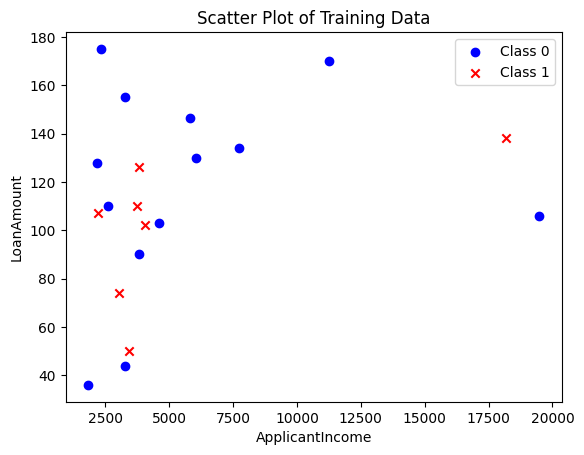

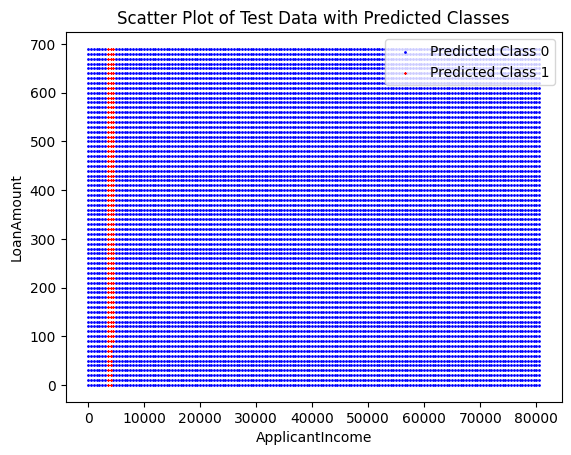

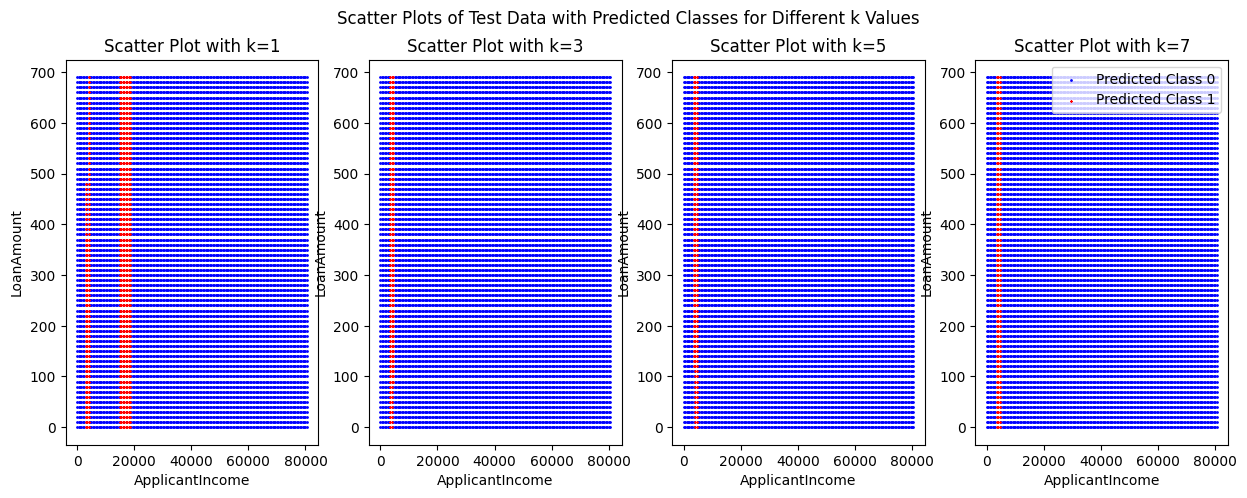

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# A3: Generate 20 data points (training set data)
file_path = '/content/loan-train.csv'
df = pd.read_csv(file_path)


# Replace NaN values with the mean of the particular column
df.fillna(df.mean(), inplace=True)

# Select two features (for example, 'ApplicantIncome' and 'LoanAmount') and assign them to X and Y
X_train = df['ApplicantIncome'].sample(20).values
Y_train = df['LoanAmount'].sample(20).values

# Assign points to two different classes (class 0 - Blue and class 1 - Red)
classes_train = np.random.randint(2, size=20)

# Scatter plot with colors based on class
plt.scatter(X_train[classes_train == 0], Y_train[classes_train == 0], c='blue', label='Class 0', marker='o')
plt.scatter(X_train[classes_train == 1], Y_train[classes_train == 1], c='red', label='Class 1', marker='x')

# Set plot labels and legend
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.show()

# A4: Generate test set data and classify using kNN (k = 3)
test_X, test_Y = np.meshgrid(np.arange(0, df['ApplicantIncome'].max(), 500), np.arange(0, df['LoanAmount'].max(), 10))
test_data = np.column_stack((test_X.ravel(), test_Y.ravel()))

# Initialize kNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the kNN classifier with training data
knn_classifier.fit(np.column_stack((X_train, Y_train)), classes_train)

# Predict classes for the test data
predicted_classes = knn_classifier.predict(test_data)

# Scatter plot with colors based on predicted class
plt.scatter(test_data[predicted_classes == 0, 0], test_data[predicted_classes == 0, 1], c='blue', s=1, label='Predicted Class 0', marker='o')
plt.scatter(test_data[predicted_classes == 1, 0], test_data[predicted_classes == 1, 1], c='red', s=1, label='Predicted Class 1', marker='x')

# Set plot labels and title
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('Scatter Plot of Test Data with Predicted Classes')
plt.legend()
plt.show()

# A5: Repeat A4 for various values of k
k_values = [1, 3, 5, 7]
classifiers = [KNeighborsClassifier(n_neighbors=k) for k in k_values]

# Create subplots for each k value
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))

for i, (k, clf) in enumerate(zip(k_values, classifiers)):
    # Fit the kNN classifier with training data
    clf.fit(np.column_stack((X_train, Y_train)), classes_train)

    # Predict classes for the test data
    predicted_classes = clf.predict(test_data)

    # Scatter plot with colors based on predicted class
    axes[i].scatter(test_data[predicted_classes == 0, 0], test_data[predicted_classes == 0, 1], c='blue', s=1, label='Predicted Class 0', marker='o')
    axes[i].scatter(test_data[predicted_classes == 1, 0], test_data[predicted_classes == 1, 1], c='red', s=1, label='Predicted Class 1', marker='x')

    # Set plot labels and title
    axes[i].set_xlabel('ApplicantIncome')
    axes[i].set_ylabel('LoanAmount')
    axes[i].set_title(f'Scatter Plot with k={k}')

# Set overall title and legend
fig.suptitle('Scatter Plots of Test Data with Predicted Classes for Different k Values')
plt.legend()
plt.show()


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

def load_project_data(file_path):
    # Load project data from CSV file
    return pd.read_csv(file_path)

def prepare_data(df, features, target):
    # Prepare data for model training
    X = df[features]
    y = df[target]
    return X, y

if __name__ == "__main__":
    # Load project data
    project_data_path = '/content/loan-train.csv'
    project_data = load_project_data(project_data_path)

    # Choose features and target variable
    features = ['ApplicantIncome', 'LoanAmount']
    target = 'Loan_Status'

    # Replace NaN values with the mean of each column
    project_data.fillna(project_data.mean(), inplace=True)

    # Prepare data for model training
    X, y = prepare_data(project_data, features, target)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the parameter grid for kNN and the range of k values to search
    param_grid = {'n_neighbors': np.arange(1, 21)}

    # Create a kNN classifier
    knn_classifier = KNeighborsClassifier()

    # Create GridSearchCV
    grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

    # Fit the model with the training data
    grid_search.fit(X_train, y_train)

    # Print the best parameters and the corresponding accuracy
    print("Best Parameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.best_score_)

    # Evaluate the model on the test set
    test_accuracy = grid_search.score(X_test, y_test)
    print("Test Set Accuracy:", test_accuracy)


<ipython-input-22-b9137d9ee4e8>:26: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  project_data.fillna(project_data.mean(), inplace=True)


Best Parameters: {'n_neighbors': 17}
Best Accuracy: 0.6782312925170068
Test Set Accuracy: 0.6504065040650406
